In [1]:
from konlpy.tag import Kkma, Okt
import csv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim import models
import numpy as np
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler

In [2]:
binpath = 'D:Applications/Fasttext/cc.ko.300.bin.gz'

ko_model = models.fasttext.load_facebook_model(binpath)

In [3]:
file_path = 'D:\KAM-LR\정서데이터ML_0224.csv'
df = pd.read_csv(file_path, sep=',')
df = df[['ID','Positive experience', 'Negative experience','Agree_M','Con_M','Extra_M','Neuro_M','Open_M','PA1','PA2','PA3','PA4','PA5',
         'PA1score','PA2score','PA3score','PA4score','PA5score','NA1','NA2','NA3','NA4','NA5','NA1score','NA2score','NA3score','NA4score','NA5score']]

In [4]:
df = df.dropna(how='all')

In [5]:
df

,ID,Positive experience,Negative experience,Agree_M,Con_M,Extra_M,Neuro_M,Open_M,PA1,PA2,...,NA1,NA2,NA3,NA4,NA5,NA1score,NA2score,NA3score,NA4score,NA5score
0,1.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,전역을 하고 복학을 하니 학교에 아는 사람이 거의 없었다,3.000000,3.000000,1.666667,2.000000,2.000000,기쁨,시원섭섭함,...,슬픔,씁슬함,무료함,NaN,NaN,3.0,4.0,3.0,NaN,NaN
1,2.0,유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 ...,온 식구가 모여 오랜만에 식사를 하는 자리에서 스트레스를 받아 울었던 일.,4.000000,4.000000,1.666667,2.000000,2.000000,즐거움,피로,...,수치심,자괴감,슬픔,외로움,경멸,3.0,5.0,5.0,3.0,4.0
2,3.0,한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음,감기에 걸려서 몸이 매우 좋지 않고 낫지도 않았던 경험,2.333333,3.333333,3.000000,3.333333,4.333333,기쁨,놀라움,...,슬픔,힘듬,아픔,추움,쓸쓸함,4.0,5.0,5.0,5.0,3.0
3,4.0,"영화관에서 영화를 보았는데 영화가 재미있었습니다, 영화관 근처 음식도 맛있었습니다.",아버지께 뺨을 맞았고 화가 나서 저도 아베지께 대들었습니다. 그리고 집에서 나왔습니다.,3.000000,3.666667,2.666667,3.000000,4.000000,행복,즐거움,...,분노,원망,슬픔,NaN,NaN,4.0,4.0,4.0,NaN,NaN
4,5.0,퇴근 후 홈트를 시작했는데 근육도 잡히고 살도 빠졌다 . 매일 하는데 뿌듯하다 .,회사에 동기가 있는데 나보다 나이도 많은데 입사 동기면서 업무 지시를 자꾸 하고 쎄...,3.666667,4.666667,2.666667,3.333333,5.000000,뿌듯함,자존감 상승,...,거슬림,짜증남,불쾌,NaN,NaN,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,4385.0,일을 할 때에 업무에 대한 실수가 있었는데 상급자의 도움으로 처리할 수 있었다.,회사 내에서 업무 실수를 해서 이를 처리하는데 시간이 좀 걸렸다.,3.000000,4.000000,2.666667,3.000000,2.666667,고마움,긍정,...,우울,당황,슬픔,NaN,NaN,1.0,3.0,2.0,NaN,NaN
4385,4386.0,좋아하는 사람 또는 다른 분야의 업무를 하는 사람들과 생각지 못한 대화를 통해서 새...,남의것을 탐하는 사람들의 불필요한 욕심들.....하 진짜 싫어,3.333333,3.000000,3.000000,3.333333,3.333333,새로움,반성,...,짜증,어이없음,화남,분노,재수없음,5.0,4.0,5.0,5.0,5.0
4386,4387.0,그냥 다이어트 성공 바다보러간거 맛있는거 먹은거 기차여행,부모님과 싸움 돈잃어버림 머 그다지 없는데 잘모르겠다 사고싶은옷 못산거,2.333333,2.666667,2.666667,2.333333,2.666667,기쁨,개운함,...,아쉬움,억울함,화남,NaN,NaN,3.0,3.0,2.0,NaN,NaN
4387,4388.0,"1. 친구생일파티 / 빕스에서 밥을 대접하고, 축하를 해주었음 2. 해외여행 / 호...",1. 싸움 / 남자친구와 소리를 지르며 싸움 2. 상사와 업무스타일이 맞지 않음,3.666667,4.666667,4.333333,2.000000,5.000000,행복,즐거움,...,짜증,분노,답답,NaN,NaN,4.0,4.0,5.0,NaN,NaN


In [26]:
df.iloc[0]["ID"]

TypeError: 'Series' object is not callable

In [6]:
kkma = Kkma()

In [7]:
e_list = []
for i, row in df.iterrows():
    e_list.append(str(df.at[i,'Positive experience']))

In [8]:
print(len(e_list))

4389


In [9]:
print(e_list)

['내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일', '유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 같이 놀았던 일.', '한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음', '영화관에서 영화를 보았는데 영화가 재미있었습니다, 영화관 근처 음식도 맛있었습니다.', '퇴근 후 홈트를 시작했는데 근육도 잡히고 살도 빠졌다 . 매일 하는데 뿌듯하다 .', '학교안에서 어떤분이 이뭣고(학습모임)활동하는데 사진을 찍어달라고 하셔서 찍었는데 찍고나서 감사인사를 받으니 뿌듯하고 기분 좋았다.', '학기 초에 동아리 회원들과 단체로 술마시는 경험 , 혼자 노래방 가기', '떡집에서 가래떡이랑 찹쌀떡이랑 약밥을 사먹었는데 너무 맛있었다. 마트에서 사먹었던 아이스크림 초코퍼지를 먹는데 너무 행복했다. CU편의점에서 찰도그체다치즈맛 사먹었는데 진짜 맛이 미쳐서 행복했다.', '남친과 함께있는것자체가 행복한 일입니다 그리고 맛집탐방', '롯데몰 식품부에서 폭립을 구매할때 판매사원이 너무 친절하게 안내해 줘서 좋았다', '출퇴근길에 잠자던것을 대신해 책을 읽으며 뿌듯함과 배우는 느낌이 들어 시간을 알차게 보내고 있다는 좋은 생각을 했습니다', '해외출장에서의 성과 - 수상, 국영방송 출연 새로운 인연을 만난 것 1년 만에 해외여행을 간 것', '점심시간에 점심먹고 나가서 잠시나마 벚꽃구경한 것이 좋았다. 햇살도 내리쬐고 간만에 잠깐의 여유로움을 느꼈다.', '혼자서 낯선 곳에 가서 많이 헤매지 않고 한 번에 목적지를 찾았다', '지인들과 함께 롯데월드가서 놀았던것이 가장 기억에 남는다', '취업준비를 위해 의정부노동복지센터에서 집단상담을 하였다', '저는 제 일중에 기뻣던 것은, 업체를 방문 후에 업체가 진짜로 필요했는데 다행이라며 감사할 때 회사나 업체 모두에게 도움이 됬다는 점이 큰 긍정적인 부분이였습니다.', '대학 테니스 동아리에서 테니스 연습을 열심히 했던 결과 지역 대회에서 좋은 성적을 냈던 경험', '

In [10]:
tok_list = []
for i in e_list:
    tok_list.append(kkma.morphs(i))

In [11]:
a = ko_model.wv.word_vec('음식')
print(len(a))

300


In [12]:
print(a.shape)

(300,)


In [13]:
embedding_dim = 300
zero_vector = np.zeros(embedding_dim)

In [14]:
print(len(zero_vector))

300


In [15]:
def calculate_sentence_vector(sentence):
  return sum([ko_model.wv.word_vec(word) for word in sentence])/len(sentence)

In [16]:
vec_list = []
for i in tok_list:
    vec_list.append(calculate_sentence_vector(i))

In [17]:
print(len(vec_list))

4389


In [18]:
print(vec_list[:3])

[array([-3.62332016e-02,  2.77861189e-02, -1.44005697e-02, -2.05055028e-02,
       -3.47115323e-02,  6.73850253e-02,  5.40320575e-02, -3.02805187e-04,
       -2.77552288e-02, -1.70969088e-02,  5.79112992e-02, -1.67968625e-03,
        1.93377454e-02,  1.83497109e-02,  4.11024392e-02, -1.21710347e-02,
        3.57489027e-02,  2.89268140e-02, -2.08010934e-02, -6.06097691e-02,
       -1.92379430e-02,  7.19322078e-03,  6.77992851e-02, -4.43281569e-02,
        2.72805318e-02,  6.49019718e-01,  1.24242958e-02,  4.18234766e-02,
        1.71670578e-02, -4.02297266e-02,  5.98937273e-02,  2.80626193e-02,
       -8.72060806e-02, -1.46961091e-02, -6.32602051e-02,  1.90293435e-02,
       -3.17305326e-02,  2.93591572e-03,  5.11364266e-03, -3.62813036e-04,
        2.03633234e-02, -1.37903402e-02, -1.71267278e-02,  6.41816575e-03,
       -3.26161436e-03, -1.35543466e-01,  2.52214260e-02,  1.17271161e-02,
       -5.86185567e-02,  6.04631118e-02, -3.56525853e-02, -3.16198841e-02,
        7.57203922e-02, 

In [19]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [38]:
c_list = []
for i, row in df.iterrows():
    c_list.append(np.array([df.at[i,'Agree_M'],df.at[i,'Con_M'],df.at[i,'Extra_M'],df.at[i,'Neuro_M'],df.at[i,'Open_M']]))

In [39]:
print(c_list)

[array([3.        , 3.        , 1.66666667, 2.        , 2.        ]), array([4.        , 4.        , 1.66666667, 2.        , 2.        ]), array([2.33333333, 3.33333333, 3.        , 3.33333333, 4.33333333]), array([3.        , 3.66666667, 2.66666667, 3.        , 4.        ]), array([3.66666667, 4.66666667, 2.66666667, 3.33333333, 5.        ]), array([3.33333333, 4.        , 2.33333333, 2.        , 2.        ]), array([3.        , 3.33333333, 3.        , 3.        , 3.33333333]), array([1.33333333, 4.        , 4.33333333, 4.33333333, 3.66666667]), array([5.        , 2.33333333, 2.        , 4.        , 4.        ]), array([3.66666667, 3.        , 3.33333333, 2.66666667, 1.66666667]), array([3.66666667, 3.66666667, 4.        , 3.33333333, 3.66666667]), array([2.33333333, 5.        , 2.66666667, 4.        , 2.        ]), array([4.33333333, 5.        , 2.        , 3.66666667, 4.33333333]), array([3.        , 3.33333333, 2.66666667, 4.33333333, 3.        ]), array([4.33333333, 4.66666667, 4.

In [29]:
df.head()

,ID,Positive experience,Negative experience,Agree_M,Con_M,Extra_M,Neuro_M,Open_M,PA1,PA2,...,NA1,NA2,NA3,NA4,NA5,NA1score,NA2score,NA3score,NA4score,NA5score
0,1.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,전역을 하고 복학을 하니 학교에 아는 사람이 거의 없었다,3.000000,3.000000,1.666667,2.000000,2.000000,기쁨,시원섭섭함,...,슬픔,씁슬함,무료함,NaN,NaN,3.0,4.0,3.0,NaN,NaN
1,2.0,유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 ...,온 식구가 모여 오랜만에 식사를 하는 자리에서 스트레스를 받아 울었던 일.,4.000000,4.000000,1.666667,2.000000,2.000000,즐거움,피로,...,수치심,자괴감,슬픔,외로움,경멸,3.0,5.0,5.0,3.0,4.0
2,3.0,한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음,감기에 걸려서 몸이 매우 좋지 않고 낫지도 않았던 경험,2.333333,3.333333,3.000000,3.333333,4.333333,기쁨,놀라움,...,슬픔,힘듬,아픔,추움,쓸쓸함,4.0,5.0,5.0,5.0,3.0
3,4.0,"영화관에서 영화를 보았는데 영화가 재미있었습니다, 영화관 근처 음식도 맛있었습니다.",아버지께 뺨을 맞았고 화가 나서 저도 아베지께 대들었습니다. 그리고 집에서 나왔습니다.,3.000000,3.666667,2.666667,3.000000,4.000000,행복,즐거움,...,분노,원망,슬픔,NaN,NaN,4.0,4.0,4.0,NaN,NaN
4,5.0,퇴근 후 홈트를 시작했는데 근육도 잡히고 살도 빠졌다 . 매일 하는데 뿌듯하다 .,회사에 동기가 있는데 나보다 나이도 많은데 입사 동기면서 업무 지시를 자꾸 하고 쎄...,3.666667,4.666667,2.666667,3.333333,5.000000,뿌듯함,자존감 상승,...,거슬림,짜증남,불쾌,NaN,NaN,1.0,1.0,1.0,NaN,NaN


In [40]:
csv_list = []
x = 0
while True:
    for i in range(x + 1,len(vec_list)):
        a = cos_sim(vec_list[x], vec_list[i])
        b = cos_sim(c_list[x], c_list[i])
        csv_list.append([df.iloc[x]["ID"],df.iloc[i]["ID"],df.iloc[x]["Positive experience"],df.iloc[i]["Positive experience"],a,df.iloc[x]["Agree_M"]
                         ,df.iloc[i]["Agree_M"],df.iloc[x]["Con_M"],df.iloc[i]["Con_M"],df.iloc[x]["Extra_M"],df.iloc[i]["Extra_M"],df.iloc[x]["Neuro_M"],df.iloc[i]["Neuro_M"],df.iloc[x]["Open_M"],df.iloc[i]["Open_M"],b])
    x = x + 1
    if df.iloc[x]["ID"] == df.iloc[-1]["ID"]:
        break

In [41]:
print(csv_list[:2])

[[1.0, 2.0, '내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일', '유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 같이 놀았던 일.', 0.88845634, 3.0, 4.0, 3.0, 4.0, 1.666666667, 1.666666667, 2.0, 2.0, 2.0, 2.0, 0.9912063845512381], [1.0, 3.0, '내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일', '한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음', 0.8195216, 3.0, 2.333333333, 3.0, 3.333333333, 1.666666667, 3.0, 2.0, 3.333333333, 2.0, 4.333333333, 0.9346287206542819]]


In [42]:
sim_df = pd.DataFrame.from_records(csv_list, columns=['ID_1','ID_2','exp_1','exp_2','exp_similarity','Agree_1','Agree_2','Con_1','Con_2','Extra_1','Extra_2','Neuro_1','Neuro_2','Open_1','Open_2','char_similarity'])

In [43]:
sim_df.head()

,ID_1,ID_2,exp_1,exp_2,exp_similarity,Agree_1,Agree_2,Con_1,Con_2,Extra_1,Extra_2,Neuro_1,Neuro_2,Open_1,Open_2,char_similarity
0,1.0,2.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 ...,0.888456,3.0,4.000000,3.0,4.000000,1.666667,1.666667,2.0,2.000000,2.0,2.000000,0.991206
1,1.0,3.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음,0.819522,3.0,2.333333,3.0,3.333333,1.666667,3.000000,2.0,3.333333,2.0,4.333333,0.934629
2,1.0,4.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,"영화관에서 영화를 보았는데 영화가 재미있었습니다, 영화관 근처 음식도 맛있었습니다.",0.728231,3.0,3.000000,3.0,3.666667,1.666667,2.666667,2.0,3.000000,2.0,4.000000,0.970254
3,1.0,5.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,퇴근 후 홈트를 시작했는데 근육도 잡히고 살도 빠졌다 . 매일 하는데 뿌듯하다 .,0.774190,3.0,3.666667,3.0,4.666667,1.666667,2.666667,2.0,3.333333,2.0,5.000000,0.970501
4,1.0,6.0,내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일,학교안에서 어떤분이 이뭣고(학습모임)활동하는데 사진을 찍어달라고 하셔서 찍었는데 찍...,0.814895,3.0,3.333333,3.0,4.000000,1.666667,2.333333,2.0,2.000000,2.0,2.000000,0.991981


In [44]:
sim_df.sort_values(by=['exp_similarity'],axis=0, ascending=False)

,ID_1,ID_2,exp_1,exp_2,exp_similarity,Agree_1,Agree_2,Con_1,Con_2,Extra_1,Extra_2,Neuro_1,Neuro_2,Open_1,Open_2,char_similarity
1964794,474.0,1373.0,"식당이나 카페에 가서 맛있는 음식을 먹은 경험, 영화관에 가서 보고 싶은 영화를 본...","영화관에 가서 보고 싶은 영화를 본 경험, 친구들과 꽃보러 놀러 간 경험, 카페나 ...",0.993154,3.333333,3.333333,3.666667,3.666667,3.333333,2.666667,3.333333,3.333333,2.000000,3.333333,0.979201
6499672,1887.0,3347.0,지난 두 달 동안에서 있었던 일 중에서 기억나는 긍정적인 경험이 없습니다.,지난 두 달 동안에 있었던 일 중에 긍정적인 경험이 전혀 없습니다.,0.984924,4.666667,1.333333,5.000000,2.333333,4.333333,1.666667,3.333333,2.333333,3.000000,2.666667,0.930192
4555950,1204.0,1394.0,토익 시험을 보고 점수가 좋아 학교에 점수를 제출했더니 장학금을 준다고 했습니다.,토익시험 본 후에 학교에 점수를 제출했더니 장학금을 받게 되었다.,0.983899,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,2.333333,2.333333,4.000000,4.000000,1.000000
1021063,240.0,1013.0,바디페인팅 시험을 봐서 시험에 합격을 했다 그래서 기분이 좋았다,바디페인팅 시험에서 합격을 해서 기분이 좋았다. 다시 시험보지 않아서 행복했다,0.983739,3.000000,3.333333,3.666667,3.666667,2.000000,1.666667,4.000000,4.000000,3.333333,3.666667,0.997404
7007783,2099.0,3612.0,3주 전쯤인것 같다. 갑자기 기분이 너무 다운돼서 누구든 만나고 싶었다. 뭔가 허전...,회사에서 오랫동안 믿고 의지해왔던 사람에게 서로 의견이 맞지않아 프로젝트를 성공적으...,0.983202,3.666667,3.333333,4.000000,4.000000,3.666667,2.666667,2.333333,5.000000,3.333333,3.333333,0.939958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582913,1544.0,3427.0,지하철에서 서서가고 있는데 앉으라며 자리 양보를 받은 적이 있다,계약성사 ...,0.267248,1.333333,4.000000,3.333333,3.666667,3.000000,3.000000,2.000000,3.000000,3.666667,3.333333,0.933035
4391037,1152.0,3427.0,열심히 일하니까 주위에서 알아 봐줘서 앞으로도 열심히 해야겠다고 느꼈다.,계약성사 ...,0.267033,2.333333,4.000000,3.000000,3.666667,2.333333,3.000000,1.666667,3.000000,3.000000,3.333333,0.983099
8671467,3005.0,3427.0,걷기 대회 등산 지리산 백두산 속리산 치악산 남산 북악산,계약성사 ...,0.249332,4.333333,4.000000,3.666667,3.666667,4.666667,3.000000,5.000000,3.000000,4.666667,3.333333,0.980665
6776037,2000.0,3427.0,월급받음,계약성사 ...,0.236190,2.000000,4.000000,3.333333,3.666667,2.000000,3.000000,2.000000,3.000000,3.333333,3.333333,0.968019


In [45]:
sim_df['exp_similarity']

0          0.888456
1          0.819522
2          0.728231
3          0.774190
4          0.814895
             ...   
9629461    0.871394
9629462    0.886082
9629463    0.809155
9629464    0.819013
9629465    0.880493
Name: exp_similarity, Length: 9629466, dtype: float64

Text(0.5, 1.0, 'Experience/Character similarity')

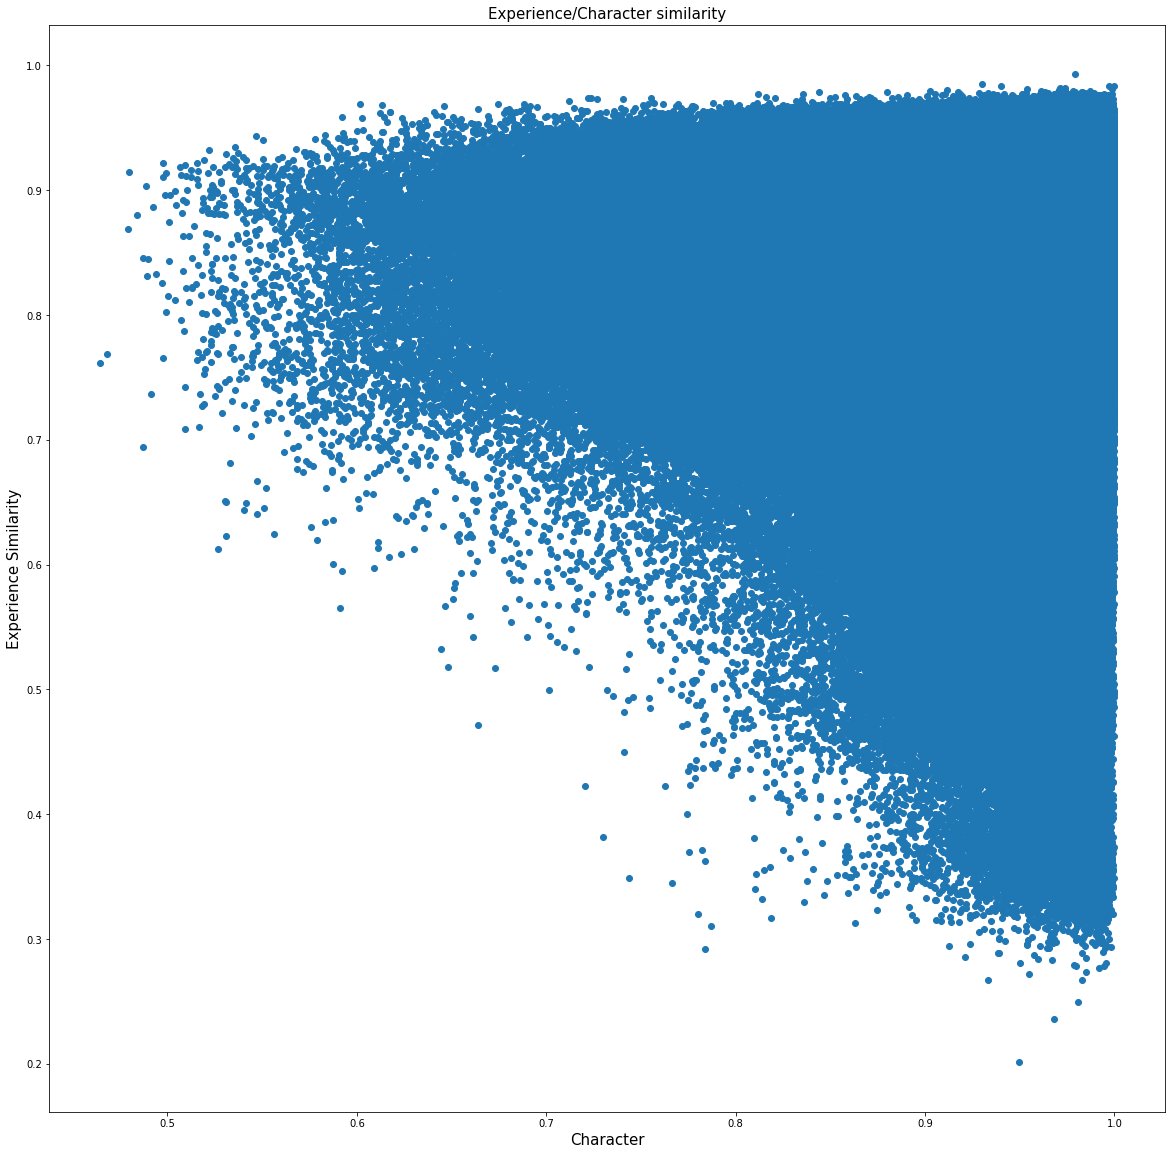

In [49]:
plt.figure(figsize=(20, 20))
plt.scatter(sim_df['char_similarity'], sim_df['exp_similarity'], marker='o')
plt.xlabel("Character", fontsize=15)
plt.ylabel("Experience Similarity", fontsize=15)
plt.title("Experience/Character similarity", fontsize=15)

In [41]:
csv_list = []
for i, row in df.iterrows():
    csv_list.append([df.at[i, 'ID'],str(df.at[i, 'Positive experience']),str(df.at[i, 'PA1']),str(df.at[i, 'PA2']),
                     str(df.at[i, 'PA3']),str(df.at[i, 'PA4']),str(df.at[i, 'PA5']),df.at[i, 'PA1score'],
                     df.at[i, 'PA2score'],df.at[i, 'PA3score'],df.at[i, 'PA4score'],df.at[i, 'PA5score'],
                     df.at[i, 'Agree_M'],df.at[i, 'Con_M'],df.at[i, 'Extra_M'],df.at[i, 'Neuro_M'],df.at[i, 'Open_M']
                     ,df.at[i, 'exp_type']])

f = open('D:\Jiyoon\experience_type.csv', 'w', encoding='utf-8-sig',newline='')
wr = csv.writer(f)
wr.writerow(['ID','positive_experience','PA1','PA2','PA3','PA4','PA5','PA1score','PA2score','PA3score','PA4score','PA5score',
             'Agree_M','Con_M','Extra_M','Neuro_M','Open_M',"exp_type"])
for i in range(len(csv_list)):
    wr.writerow([csv_list[i][0], csv_list[i][1], csv_list[i][2], csv_list[i][3], csv_list[i][4], csv_list[i][5]
                , csv_list[i][6], csv_list[i][7], csv_list[i][8], csv_list[i][9], csv_list[i][10], csv_list[i][11]
                , csv_list[i][12], csv_list[i][13], csv_list[i][14], csv_list[i][15], csv_list[i][16], csv_list[i][17]])

f.close()